# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    # Build partial query URL
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
        
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | irymple
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | kushikino
Processing Record 5 of Set 1 | puerto baquerizo moreno
Processing Record 6 of Set 1 | chibougamau
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | kelaat mgouna
City not found. Skipping...
Processing Record 11 of Set 1 | san antonio de pale
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | coahuayana de hidalgo
Processing Record 16 of Set 1 | namibe
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | bamboo flat
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | grytviken
Process

Processing Record 41 of Set 4 | ashibetsu
Processing Record 42 of Set 4 | paoua
Processing Record 43 of Set 4 | kresttsy
Processing Record 44 of Set 4 | salekhard
Processing Record 45 of Set 4 | east ballina
Processing Record 46 of Set 4 | durango
Processing Record 47 of Set 4 | uturoa
Processing Record 48 of Set 4 | birao
Processing Record 49 of Set 4 | illizi
Processing Record 0 of Set 5 | tefe
Processing Record 1 of Set 5 | marathon
Processing Record 2 of Set 5 | xining
Processing Record 3 of Set 5 | nzega
Processing Record 4 of Set 5 | calatayud
Processing Record 5 of Set 5 | kavaratti
Processing Record 6 of Set 5 | yoloten
Processing Record 7 of Set 5 | crane
Processing Record 8 of Set 5 | kansk
Processing Record 9 of Set 5 | levuka
Processing Record 10 of Set 5 | mount pearl
Processing Record 11 of Set 5 | kourou
Processing Record 12 of Set 5 | chinde
Processing Record 13 of Set 5 | north bend
Processing Record 14 of Set 5 | klyuchi
Processing Record 15 of Set 5 | susuman
Process

Processing Record 31 of Set 8 | pathein
Processing Record 32 of Set 8 | nantucket
Processing Record 33 of Set 8 | ahau
City not found. Skipping...
Processing Record 34 of Set 8 | isangel
Processing Record 35 of Set 8 | cable beach
City not found. Skipping...
Processing Record 36 of Set 8 | kuta
Processing Record 37 of Set 8 | nizhniy odes
Processing Record 38 of Set 8 | kittila
Processing Record 39 of Set 8 | punta arenas
Processing Record 40 of Set 8 | al ghayzah
Processing Record 41 of Set 8 | tual
Processing Record 42 of Set 8 | tralee
Processing Record 43 of Set 8 | dzhangala
Processing Record 44 of Set 8 | kingston
Processing Record 45 of Set 8 | itoman
Processing Record 46 of Set 8 | bargaal
Processing Record 47 of Set 8 | mandalgovi
Processing Record 48 of Set 8 | canyon
Processing Record 49 of Set 8 | thunder bay
Processing Record 0 of Set 9 | luderitz
Processing Record 1 of Set 9 | nagasaki
Processing Record 2 of Set 9 | banda aceh
Processing Record 3 of Set 9 | alegrete
Proce

Processing Record 20 of Set 12 | nagqu
Processing Record 21 of Set 12 | borgarnes
Processing Record 22 of Set 12 | fort st. john
Processing Record 23 of Set 12 | znin
Processing Record 24 of Set 12 | santa rosalia
Processing Record 25 of Set 12 | lerwick
Processing Record 26 of Set 12 | lumut
Processing Record 27 of Set 12 | greystones
Processing Record 28 of Set 12 | sarandi del yi
Processing Record 29 of Set 12 | tucupita
Processing Record 30 of Set 12 | arroyo
Processing Record 31 of Set 12 | nar'yan-mar
Processing Record 32 of Set 12 | bontang
Processing Record 33 of Set 12 | fortuna
Processing Record 34 of Set 12 | kirakira
Processing Record 35 of Set 12 | dubovka
Processing Record 36 of Set 12 | trikala
Processing Record 37 of Set 12 | degema hulk
Processing Record 38 of Set 12 | muroto-misakicho
Processing Record 39 of Set 12 | kuacjok
Processing Record 40 of Set 12 | filadelfia
Processing Record 41 of Set 12 | kailua-kona
Processing Record 42 of Set 12 | quang ngai
Processing R

In [4]:
# Convert the cities weather data into a Pandas DataFrame   
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,irymple,-34.2500,142.1667,25.05,36,100,3.36,AU,1699938171
1,yellowknife,62.4560,-114.3525,-3.71,86,100,5.66,CA,1699938110
2,iqaluit,63.7506,-68.5145,-17.95,59,0,3.09,CA,1699938023
3,kushikino,31.7167,130.2667,16.71,56,10,3.41,JP,1699938171
4,puerto baquerizo moreno,-0.9000,-89.6000,23.72,82,91,4.46,EC,1699938171


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,irymple,-34.2500,142.1667,25.05,36,100,3.36,AU,1699938171
1,yellowknife,62.4560,-114.3525,-3.71,86,100,5.66,CA,1699938110
2,iqaluit,63.7506,-68.5145,-17.95,59,0,3.09,CA,1699938023
3,kushikino,31.7167,130.2667,16.71,56,10,3.41,JP,1699938171
4,puerto baquerizo moreno,-0.9000,-89.6000,23.72,82,91,4.46,EC,1699938171


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

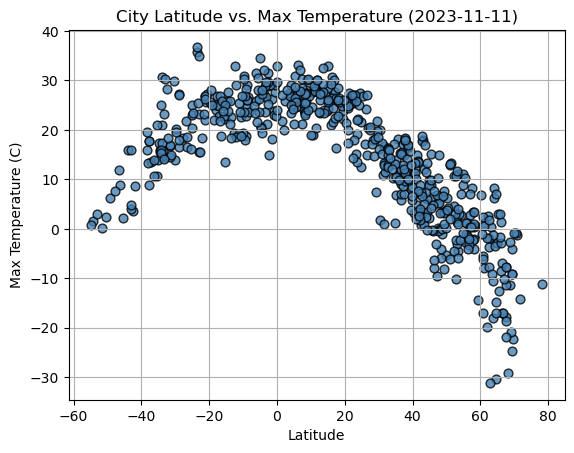

<Figure size 640x480 with 0 Axes>

In [8]:
# Build scatter plot for latitude vs. temperature

x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, 
            color = "steelblue", 
            alpha = .8,
            linewidths = 1,
            marker = "o", 
            edgecolor = "black",
            s = 40,)

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Latitude vs. Max Temperature (2023-11-11)")
plt.show()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

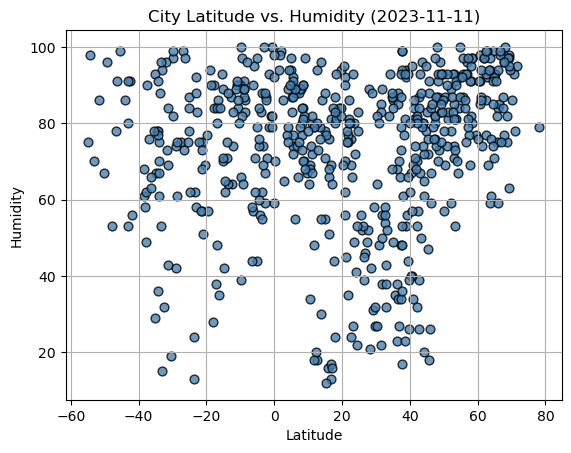

<Figure size 640x480 with 0 Axes>

In [9]:
# Build the scatter plots for latitude vs. humidity

x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, 
            color = "steelblue", 
            alpha = .8,
            linewidths = 1,
            marker = "o", 
            edgecolor = "black",
            s = 40,)

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Latitude vs. Humidity (2023-11-11)")
plt.show()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

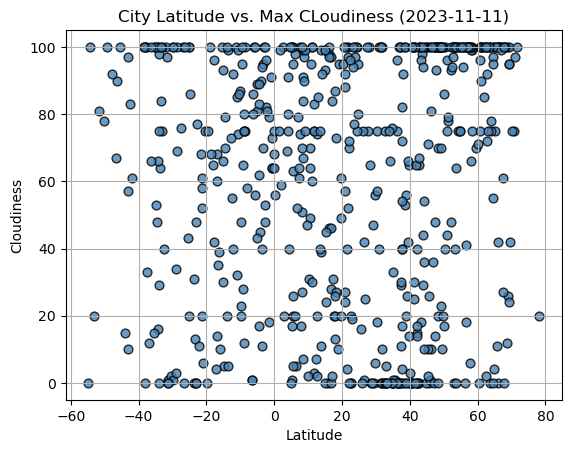

<Figure size 640x480 with 0 Axes>

In [10]:
# Build the scatter plots for latitude vs. cloudiness

x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, 
            color = "steelblue", 
            alpha = .8,
            linewidths = 1,
            marker = "o", 
            edgecolor = "black",
            s = 40,)

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Latitude vs. Max CLoudiness (2023-11-11)")
plt.show()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

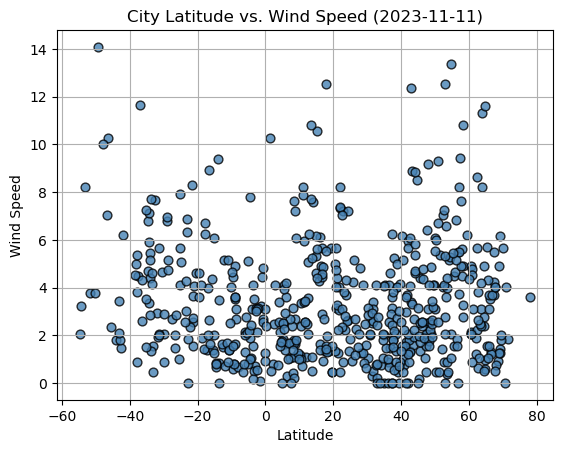

<Figure size 640x480 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. wind speed

x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, 
            color = "steelblue", 
            alpha = .8,
            linewidths = 1,
            marker = "o", 
            edgecolor = "black",
            s = 40,)

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("City Latitude vs. Wind Speed (2023-11-11)")
plt.show()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

### Function to compute and plot linear regression and r-value
###
###     xlabel,ylabel - passed the labels for the x and y axis
###     xcolumn,ycolumn - passed the data columns to be compared
###     xccord,ycoord - passed to determine where to place the equation
###
def plot_regression(xlabel, xcolumn, ylabel, ycolumn, xcoord, ycoord):
    
    # Find the r-value from the correlation coefficient
    r = stats.pearsonr(xcolumn, ycolumn)[0]
    print(f"The r-value is:  {abs(r)}")
    
    # Perform a linear regression
    regress_slope, regress_int, regress_r, regress_p, regress_std_err = stats.linregress(xcolumn,ycolumn)
    
    # Create equation of line
    regress_fit = regress_slope * xcolumn + regress_int
    
    # Put the equation into the plot
    line_eq = "y = " + str(round(regress_slope,2)) + "x + " + str(round(regress_int,2))
    plt.annotate(line_eq,(xcoord,ycoord), fontsize=15,color="red")
    
    # Plot the linear model on top of scatter plot 
    plt.scatter(xcolumn,ycolumn)
    plt.plot(xcolumn, regress_fit, 'r')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,-3.71,86,100,5.66,CA,1699938110
2,iqaluit,63.7506,-68.5145,-17.95,59,0,3.09,CA,1699938023
3,kushikino,31.7167,130.2667,16.71,56,10,3.41,JP,1699938171
5,chibougamau,49.9168,-74.3659,-5.21,93,100,3.09,CA,1699938172
6,georgetown,5.4112,100.3354,30.96,74,20,4.12,MY,1699938172


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,irymple,-34.2500,142.1667,25.05,36,100,3.36,AU,1699938171
4,puerto baquerizo moreno,-0.9000,-89.6000,23.72,82,91,4.46,EC,1699938171
7,edinburgh of the seven seas,-37.0676,-12.3116,13.50,76,12,11.67,SH,1699938172
8,port-aux-francais,-49.3500,70.2167,6.25,96,100,14.09,TF,1699938167
9,san antonio de pale,-1.4014,5.6325,26.15,79,18,3.23,GQ,1699938172


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:  0.8946496763522154


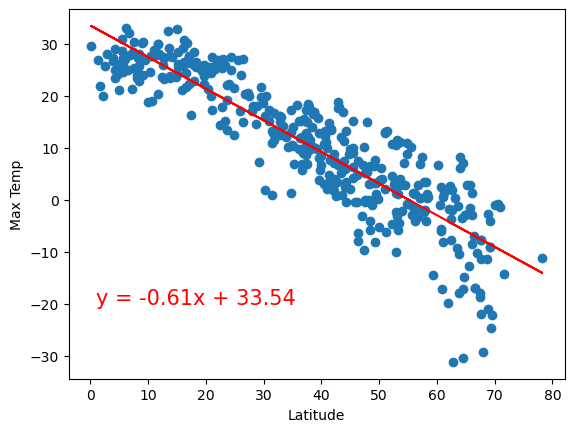

In [15]:
# Linear regression on Northern Hemisphere

### Prepare the variables to pass to the function 'plot_regression'
# Identify the lables
x_label = "Latitude"
y_label = "Max Temp"
# Identify the columns to be correlated
x_column = northern_hemi_df['Lat']
y_column = northern_hemi_df['Max Temp']
# Determine the coordinates for the equation
x_coord = 1
y_coord = -20

plot_regression(x_label, x_column, y_label, y_column, x_coord, y_coord)

The r-value is:  0.710313657567754


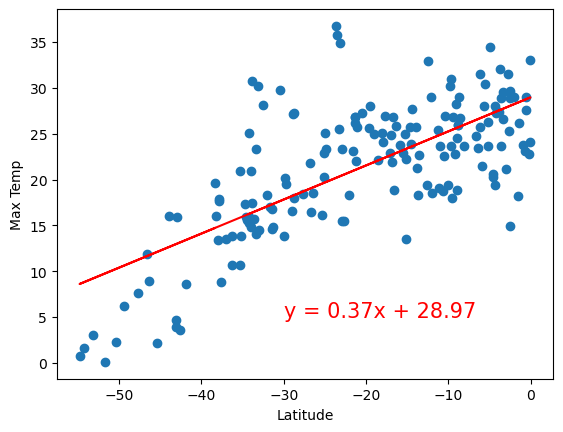

In [16]:
# Linear regression on Southern Hemisphere

### Prepare the variables to pass to the function 'plot_regression'
# Idenitfy the lables
x_label = "Latitude"
y_label = "Max Temp"
# Identify the columns for correlation
x_column = southern_hemi_df['Lat']
y_column = southern_hemi_df['Max Temp']
# Determine the coordinates for the equation
x_coord = -30
y_coord = 5

plot_regression(x_label, x_column, y_label, y_column, x_coord, y_coord)

**Discussion about the linear relationship:** There is a strong inverse correlation in the northern hemisphere: as the latitudes increase, the max temp decreases. So, moving further north, we will find lower max temps. There is a lesser correlation in the southern hemisphere: as the latitudes decrease, or as we move further south, the max temps decrease. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is:  0.24602762897698752


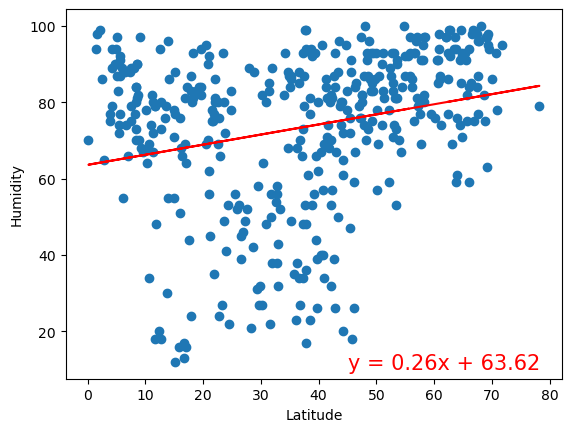

In [17]:
# Northern Hemisphere

### Prepare the variables to pass to the function 'plot_regression'
# Identify the labels
x_label = "Latitude"
y_label = "Humidity"
# Identify the columns to be correlated
x_column = northern_hemi_df['Lat']
y_column = northern_hemi_df['Humidity']
# Determine the coordinate for the equation
x_coord = 45
y_coord = 10

plot_regression(x_label, x_column, y_label, y_column, x_coord, y_coord)

The r-value is:  0.10000639855408239


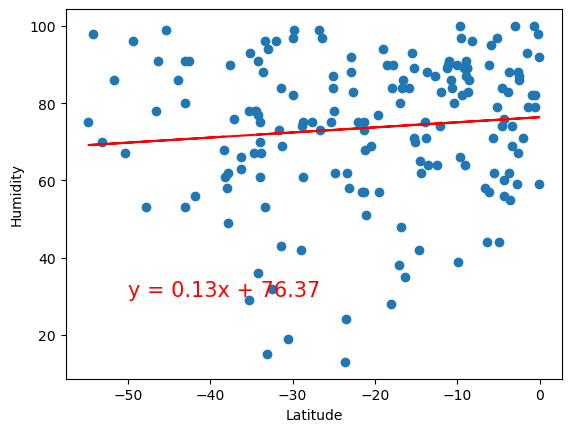

In [18]:
# Southern Hemisphere

### Prepare the variables to pass to the function 'plot_regression'
# Labels
x_label = "Latitude"
y_label = "Humidity"
# Identify the columns to be correlated
x_column = southern_hemi_df['Lat']
y_column = southern_hemi_df['Humidity']
# Determine the coordinates of the equation
x_coord = -50
y_coord = 30

# Call the plot function
plot_regression(x_label, x_column, y_label, y_column, x_coord, y_coord)

**Discussion about the linear relationship:** There is a slight correlation in the northern hemisphere: as the latitudes increase, the humidity levels increase. So, moving further north, we will find higher humidities. There is a lesser correlation in the southern hemisphere: as the latitudes decrease, or as we move further south, the humidity levels decrease. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:  0.1513701289784105


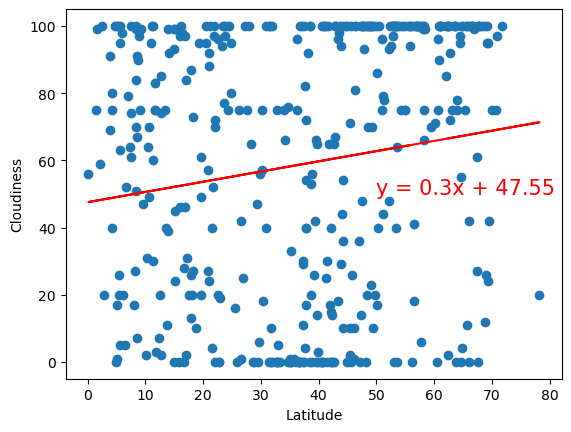

In [19]:
# Northern Hemisphere

### Prepare the variables to pass to the function 'plot_regression'
# Labels
x_label = "Latitude"
y_label = "Cloudiness"
# Identify the columns to be correlated
x_column = northern_hemi_df['Lat']
y_column = northern_hemi_df['Cloudiness']
# Determine the coordinates of the equation
x_coord = 50
y_coord = 50

# Call the plot function
plot_regression(x_label, x_column, y_label, y_column, x_coord, y_coord)

The r-value is:  0.037530719967453635


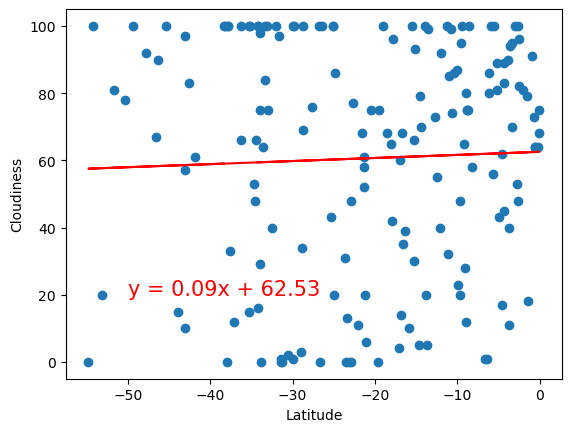

In [20]:
# Southern Hemisphere

### Prepare the variables to pass to the function 'plot_regression'
# Labels
x_label = "Latitude"
y_label = "Cloudiness"
# Identify the columns to be correlated
x_column = southern_hemi_df['Lat']
y_column = southern_hemi_df['Cloudiness']
# Determine the coordinates of the equation
x_coord = -50
y_coord = 20

# Call the plot function
plot_regression(x_label, x_column, y_label, y_column, x_coord, y_coord)

**Discussion about the linear relationship:** There is a correlation in the northern hemisphere: as the latitudes increase, the cloudiness increases. So, moving further north, we will find higher cloudiness levels. There is a lesser correlation in the southern hemisphere: as the latitudes decrease, or as we move further south, the cloudiness levels decrease.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:  0.08029585066013056


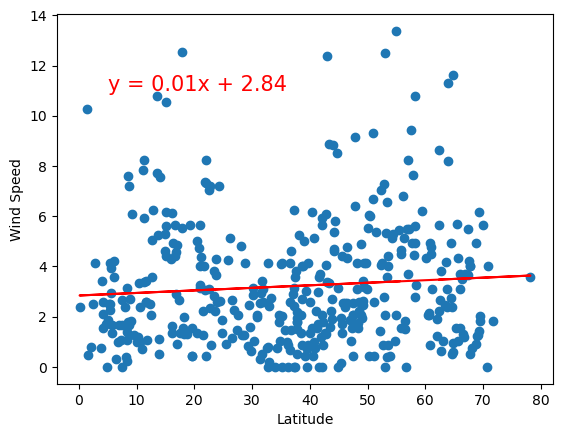

In [24]:
# Northern Hemisphere

### Prepare the variables to pass to the function 'plot_regression'
# Labels
x_label = "Latitude"
y_label = "Wind Speed"
# Identify the columns to be correlated
x_column = northern_hemi_df['Lat']
y_column = northern_hemi_df['Wind Speed']
# Determine the coordinates of the equation
x_coord = 5
y_coord = 11

# Call the plot function
plot_regression(x_label, x_column, y_label, y_column, x_coord, y_coord)

The r-value is:  0.3869578564454803


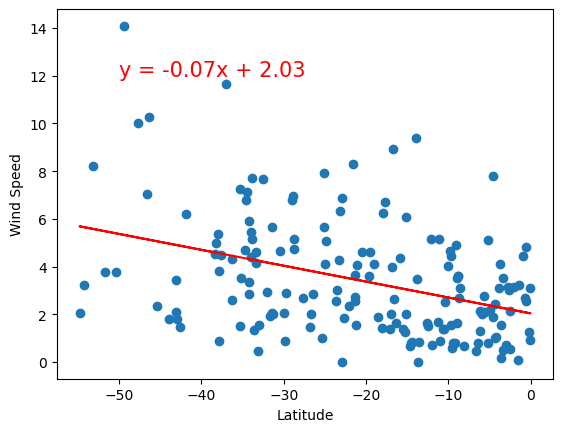

In [25]:
# Southern Hemisphere

### Prepare the variables to pass to the function 'plot_regression'
# Labels
x_label = "Latitude"
y_label = "Wind Speed"
# Identify the columns to be correlated
x_column = southern_hemi_df['Lat']
y_column = southern_hemi_df['Wind Speed']
# Determine the coordinates of the equation
x_coord = -50
y_coord = 12

# Call the plot function
plot_regression(x_label, x_column, y_label, y_column, x_coord, y_coord)

**Discussion about the linear relationship:** There is a slight correlation in the northern hemisphere: as the latitudes increase, the wind speed levels increase. So, moving further north, we might find higher winds. There is an inverse correlation in the southern hemisphere: as the latitudes decrease, or as we move further south, the wind speed levels increase. 